In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'microsoft-catsvsdogs-dataset' dataset.
Path to dataset files: /kaggle/input/microsoft-catsvsdogs-dataset


In [2]:
import os

print(os.listdir(path))

['PetImages', 'readme[1].txt', 'MSR-LA - 3467.docx']


In [3]:
DATASET_DIR = os.path.join(path, "PetImages")
print(os.listdir(DATASET_DIR))

['Dog', 'Cat']


In [4]:
!pip install tensorflow --quiet

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = val_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [6]:
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [7]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Cat vs Dog
])

In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,278,594 (187.98 MB)

 Trainable params: 25,690,882 (98.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [13]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
404/625 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.5688 - loss: 0.6860

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5759 - loss: 0.6799

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 122ms/step - accuracy: 0.5759 - loss: 0.6799 - val_accuracy: 0.6555 - val_loss: 0.6370
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - accuracy: 0.6130 - loss: 0.6514 - val_accuracy: 0.6455 - val_loss: 0.6312
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 112ms/step - accuracy: 0.6388 - loss: 0.6375 - val_accuracy: 0.6753 - val_loss: 0.6136
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 111ms/step - accuracy: 0.6426 - loss: 0.6282 - val_accuracy: 0.6789 - val_loss: 0.6071
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 112ms/step - accuracy: 0.6521 - loss: 0.6205 - val_accuracy: 0.6891 - val_loss: 0.5938
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 111ms/step - accuracy: 0.6498 - loss: 0.6177 - val_accuracy: 0.6733 - val_loss: 0.6136
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 111ms/step - accuracy: 0.6604 - loss: 0.6135 - val_accuracy: 0.6887 - val_loss: 0.5964
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - accuracy: 0.6694 - loss: 0.6044 - val

In [12]:
import os
from PIL import Image, UnidentifiedImageError
import shutil # Import shutil for copying directories

# The original DATASET_DIR points to a read-only location.
# We need to copy it to a writable location first.
original_dataset_path = DATASET_DIR
writable_dataset_path = "/content/PetImages_writable"

# Create the writable directory and copy contents if it doesn't exist
if not os.path.exists(writable_dataset_path):
    print(f"Copying dataset from {original_dataset_path} to {writable_dataset_path} for cleaning...")
    shutil.copytree(original_dataset_path, writable_dataset_path)
    print("Dataset copied successfully.")
else:
    print(f"Using existing writable dataset at {writable_dataset_path}.")

# Now, all operations should use the writable path
image_source_path = writable_dataset_path

# List of categories (Cat, Dog)
categories = ['Cat', 'Dog']

print("Starting dataset cleaning for corrupted images...")

removed_files_count = 0

for category in categories:
    category_path = os.path.join(image_source_path, category)
    if os.path.exists(category_path):
        print(f"Processing category: {category_path}")
        # Create a list of files to iterate, as files might be removed during iteration
        files_to_check = list(os.listdir(category_path))
        for filename in files_to_check:
            file_path = os.path.join(category_path, filename)
            try:
                # Attempt to open and verify the image
                img = Image.open(file_path)
                img.verify() # Verify file integrity
                img.close()
            except (IOError, SyntaxError, UnidentifiedImageError) as e:
                print(f"Removing corrupted/unreadable image: {file_path} (Error: {e})")
                os.remove(file_path) # This will now work on the writable copy
                removed_files_count += 1
            except Exception as e:
                print(f"An unexpected error occurred with file {file_path}: {e}")
                # Consider removing if it's a critical error, otherwise skip
                os.remove(file_path) # This will now work on the writable copy
                removed_files_count += 1
    else:
        print(f"Warning: Category path not found: {category_path}")

print(f"Dataset cleaning complete. Removed {removed_files_count} corrupted/unreadable files.")

# After cleaning, re-initialize the ImageDataGenerator to reflect changes
# Re-running the original ImageDataGenerator cell (Fm2ne5KvEmAA) is also an option.

# Re-initialize the ImageDataGenerator here directly for convenience
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    image_source_path, # Use the new writable path for data generation
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    image_source_path, # Use the new writable path for data generation
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Copying dataset from /kaggle/input/microsoft-catsvsdogs-dataset/PetImages to /content/PetImages_writable for cleaning...
Dataset copied successfully.
Starting dataset cleaning for corrupted images...
Processing category: /content/PetImages_writable/Cat
Removing corrupted/unreadable image: /content/PetImages_writable/Cat/666.jpg (Error: cannot identify image file '/content/PetImages_writable/Cat/666.jpg')
Removing corrupted/unreadable image: /content/PetImages_writable/Cat/Thumbs.db (Error: cannot identify image file '/content/PetImages_writable/Cat/Thumbs.db')
Processing category: /content/PetImages_writable/Dog


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Removing corrupted/unreadable image: /content/PetImages_writable/Dog/11702.jpg (Error: cannot identify image file '/content/PetImages_writable/Dog/11702.jpg')
Removing corrupted/unreadable image: /content/PetImages_writable/Dog/Thumbs.db (Error: cannot identify image file '/content/PetImages_writable/Dog/Thumbs.db')
Dataset cleaning complete. Removed 4 corrupted/unreadable files.
Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


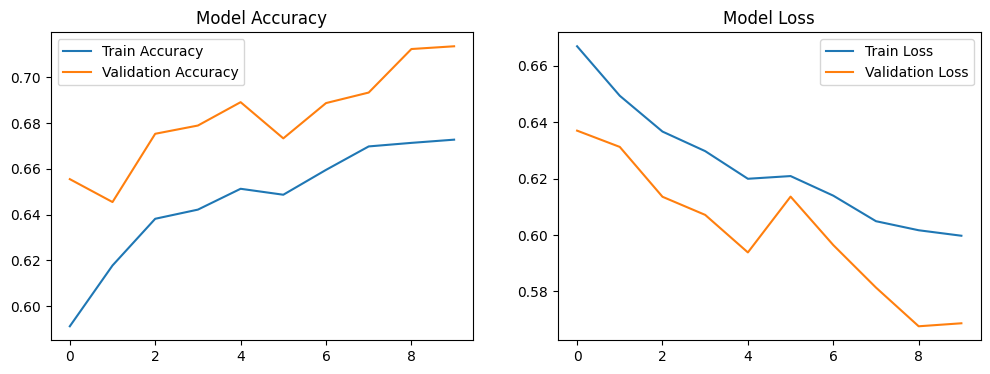

In [14]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [15]:
for layer in base_model.layers[-50:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=3)
]

model.fit(
    train_data,
    validation_data=val_data,
    epochs=25,
    callbacks=callbacks
)


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 178ms/step - accuracy: 0.6266 - loss: 0.8771 - val_accuracy: 0.7397 - val_loss: 0.5587 - learning_rate: 1.0000e-05
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 167ms/step - accuracy: 0.7316 - loss: 0.5373 - val_accuracy: 0.7285 - val_loss: 0.5255 - learning_rate: 1.0000e-05
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.7696 - loss: 0.4933 - val_accuracy: 0.6883 - val_loss: 0.6725 - learning_rate: 1.0000e-05
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 178ms/step - accuracy: 0.7803 - loss: 0.4682 - val_accuracy: 0.7681 - val_loss: 0.5086 - learning_rate: 1.0000e-05
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 167ms/step - accuracy: 0.7977 - loss: 0.4396 - val_accuracy: 0.7055 - val_loss: 0.5505 - learning_rate: 1.0000e-05
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 167ms/step - accuracy: 0.8128 - loss: 0.4129 - val_accuracy: 0.6669 - val_loss: 0.6628 - learning_rate: 1.0000e-05
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
model.save("cats_vs_dogs_transfer_learning.h5")

Saving 2111331.jpg to 2111331.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


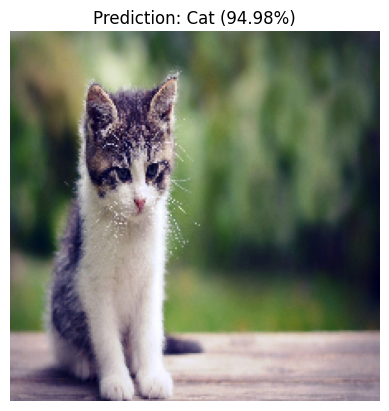

In [21]:
from google.colab import files
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load trained model
model = tf.keras.models.load_model("cats_vs_dogs_transfer_learning.h5")

IMG_SIZE = (224, 224)
class_names = ['Cat', 'Dog']

# Upload image (this opens "Choose file")
uploaded = files.upload()

# Automatically get uploaded image
for file_name in uploaded.keys():
    IMAGE_PATH = file_name

    # Load & preprocess
    img = image.load_img(IMAGE_PATH, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Display result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.show()